In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

Solve Heat Equation in one-dimension

$u_t = \kappa u_{xx}$

* Metal rod of length $L$
* Initial temperature distribution
* Boundary conditions

Numerical Solution:
$u_{i,j+1} \approx  u_{i,j} + F\big(u_{i+1,j} - 2u_{i,j} + u_{i-1,j} \big)$

In [45]:
#length 
L = 1.0

#spatial divisions
nx = 50
x = np.linspace(0., 1, nx+1)
dx = x[1]-x[0]
print('dx=',dx)

#iteration
nt = 5000

#timestep
dt = 0.001
print('dt=',dt)

t = np.linspace(0., nt*dt, nt+1)
# print(t)

#kappa
k = 0.1

#Fourier number
F = k*dt/(dx**2)
print('Fourier number=', F)

##temp
u = np.zeros((nx+1, nt+1))

#initial temperature (t=0) profile
u[:,0] = np.sin(np.pi*x)

#boundary conditions
u[0,:] = 0.
u[-1,:] = 0.

for j in range(1,nt):
    for i in range(1, nx):
        u[i,j] = u[i,j-1] + F*(u[i+1,j-1] - 2*u[i,j-1] + u[i-1,j-1])

dx= 0.02
dt= 0.001
Fourier number= 0.25


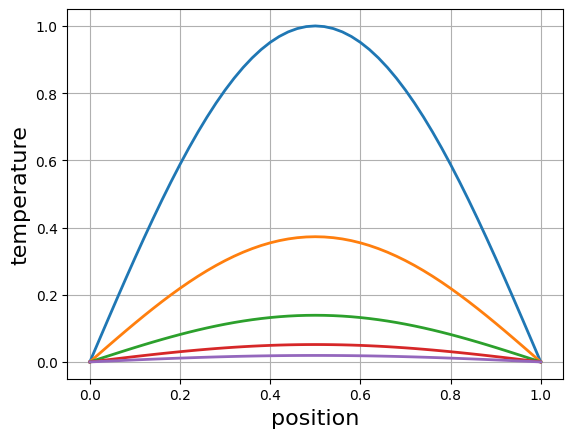

In [46]:
for j in range(nt):
    if j%1000 ==0:
        plt.plot(x, u[:,j], ls='-', lw=2)

plt.xlabel('position', fontsize=16)
plt.ylabel('temperature', fontsize=16)
plt.grid()

plt.show()

In [47]:
# Solving using Ax=b form

Fourier no= 0.25
[[ 1.    0.    0.   ...  0.    0.    0.  ]
 [-0.25  1.5  -0.25 ...  0.    0.    0.  ]
 [ 0.   -0.25  1.5  ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  1.5  -0.25  0.  ]
 [ 0.    0.    0.   ... -0.25  1.5  -0.25]
 [ 0.    0.    0.   ...  0.    0.    1.  ]]


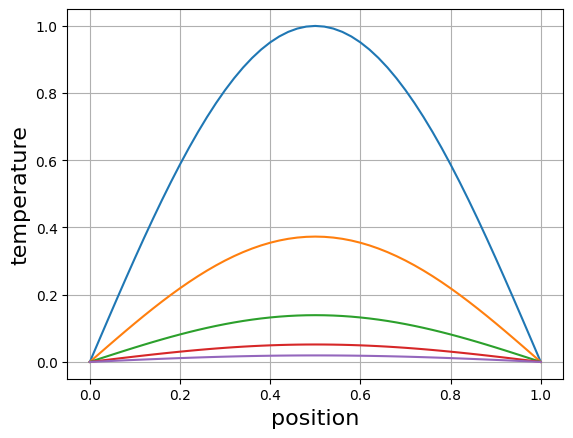

In [48]:
L = 1.0
nx = 50

x = np.linspace(0., L, nx+1)
# print(x)
dx = x[1]-x[0]

nt = 5000
dt = 0.001

t = np.linspace(0., nt*dt, nt+1)
# print(t)

k = 0.1
F = k*dt/(dx**2)
print('Fourier no=', F)

#function
u = np.zeros((nx+1))

#initial condition
u_0 = np.sin(np.pi*x)

#Ax=b
A = np.zeros((nx+1, nx+1))
b = np.zeros(nx+1)

for i in range(1,nx):
    A[i,i] = 1 + 2*F
    A[i,i+1] = -1*F
    A[i,i-1] = -1*F
    A[0,0] = 1.
    A[nx,nx] = 1.
    
for n in range(0, nt):
    b = u_0
    b[0] = b[nx] = 0.
    u = np.linalg.solve(A,b)
    #update u_0
    u_0[:] = u[:]
    if n%1000 == 0:
        plt.plot(x,u_0)
    
print(A)
plt.xlabel('position', fontsize=16)
plt.ylabel('temperature', fontsize=16)
plt.grid()

plt.show()

In [49]:
#length 
L_x = 1.0
L_y = 1.0

#spatial divisions
nx = 50
ny = 50
x = np.linspace(0., 1, nx+1)
y = np.linspace(0., 1, ny+1)
dx = x[1]-x[0]
print('dx=',dx)
dy = y[1]-y[0]
print('dy=',dy)

#iteration
nt = 1000

#timestep
dt = 0.001
print('dt=',dt)

t = np.linspace(0., nt*dt, nt+1)
# print(t)

#kappa
k = 0.1

#Fourier number
F_x = k*dt/(dx**2)
F_y = k*dt/(dy**2)
print('Fourier number in x-direction=', F_x)
print('Fourier number in y-direction=', F_y)

##temp
u = np.zeros((nt+1, nx+1, ny+1))

#initial temperature (t=0) profile
X, Y = np.meshgrid(x, y, indexing='ij')
u[0, :,:] = np.cos(Y) + np.sin(X)

#boundary conditions
u[:, 0, :] = x**2
u[:, -1, :] = y + x
u[:, :, 0] = y**2
u[:, :, -1] = y-x

for k in range(1,nt):
    for i in range(1, nx):
        for j in range(1, ny):
            u[k, i, j] = u[k-1, i, j] + F_x*(u[k-1, i+1,j] - 2*u[k-1, i, j] + u[k-1, i-1, j]) + F_y*(u[k-1, i,j+1] - 2*u[k-1, i, j] + u[k-1, i, j-1])

dx= 0.02
dy= 0.02
dt= 0.001
Fourier number in x-direction= 0.25
Fourier number in y-direction= 0.25


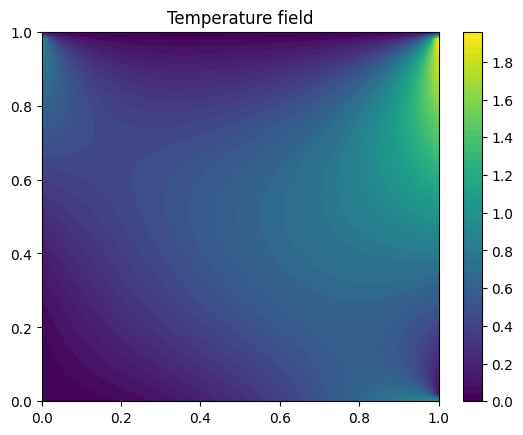

In [50]:
colorinterpolation = 50
colorMap = plt.cm.viridis

fig = plt.figure()
ax =fig.add_subplot(1,1,1)
ax.cla()
y = ax.contourf(X,Y,u[nt-1,:,:],colorinterpolation, cmap=colorMap)
fig.colorbar(y)
ax.set_title('Temperature field')

plt.show()